## Contours

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os
import glob
from os import listdir
from os.path import isfile, join
from tqdm import tqdm_notebook
import numpy as np
import torch

In [50]:
!pwd

/media/xsardas/HDD/Remote/NN/Project


In [12]:
from skimage import color
from PIL import Image


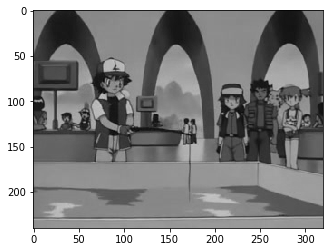

In [37]:
img1 = cv2.imread('data/greyscale.png')
plt.imshow(img)
plt.show()

In [46]:
def pil_loader(path):
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

In [129]:
img = pil_loader('data/1/image_1.jpg')

In [72]:
img = np.array(img)

In [83]:
img.shape

(240, 320, 3)

In [66]:
img_lab = color.rgb2lab(np.array(img))

In [67]:
img = (img - 127.5) / 127.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


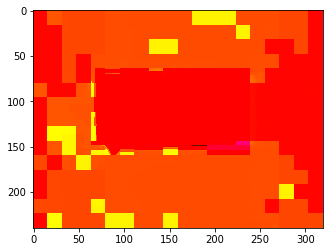

In [68]:
plt.imshow(img_lab)
plt.show()

In [69]:
img = torch.FloatTensor(np.transpose(img, (2,0,1)))
img_lab = torch.FloatTensor(np.transpose(img_lab, (2,0,1)))

img_l = torch.unsqueeze(img_lab[0],0) / 100. # L channel 0-100
img_ab = (img_lab[1::] + 0) / 110. # ab channel -110 - 110

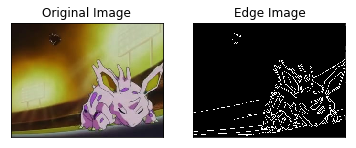

In [155]:
img = cv2.imread('data/1/image_25.jpg')
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [156]:
edges.shape[0]

240

In [157]:
edges = edges[:, :, np.newaxis]

In [158]:
edges = np.concatenate((edges, edges, edges), axis=2)

In [159]:
edges.shape

(240, 320, 3)

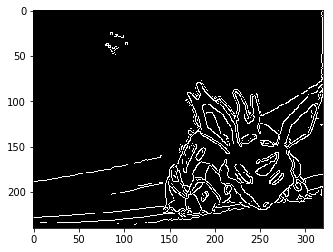

In [160]:
plt.imshow(edges)
plt.show()

In [163]:
img_lab = color.rgb2lab(np.array(edges))

In [164]:
img = torch.FloatTensor(np.transpose(edges, (2,0,1)))
img_lab = torch.FloatTensor(np.transpose(img_lab, (2,0,1)))

img_l = torch.unsqueeze(img_lab[0],0) / 100. # L channel 0-100

In [147]:
# import the necessary packages
import numpy as np
import argparse
import glob
 
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

In [148]:
img = cv2.imread('data/1/image_25.jpg')


In [149]:
blurred = cv2.GaussianBlur(img, (3, 3), 0)

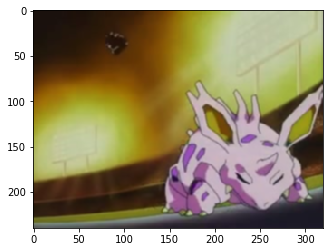

In [150]:
plt.imshow(blurred)
plt.show()

In [151]:
# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

# # show the images
# cv2.imshow("Original", image)
# cv2.imshow("Edges", np.hstack([wide, tight, auto]))
# cv2.waitKey(0)

In [ ]:
wide = 255 - wide

In [ ]:
from PIL import Image

In [ ]:
img = Image.fromarray(wide)
img.save('contours_wide.png')
img.show()

In [ ]:
img = Image.fromarray(auto)
img.save('contours_tight.png')
img.show()

In [ ]:
img = Image.fromarray(auto)
img.save('contours_auto.png')
img.show()

In [11]:
all_paths = []
def get_files(dir_name, mask="*.png"):
    return glob.glob(dir_name + mask)

In [12]:
paths = get_files('./data/1/', '*.jpg')

In [13]:
for i in range(1, 105):
    all_paths.extend(get_files('./data/' + str(i) + '/', '*.jpg'))

In [14]:
all_paths[:5]

['./data/1/frame_473.jpg',
 './data/1/frame_1.jpg',
 './data/1/frame_10.jpg',
 './data/1/frame_100.jpg',
 './data/1/frame_1000.jpg']

### Rename files

In [25]:
k = 1
for i in range(1, 105):
    for dpath, dnames, fnames in os.walk('/media/xsardas/HDD/Remote/NN/Project/data/' + str(i) + '/'):
        for f in fnames:
            os.chdir(dpath)
            if f.startswith('frame_'):
                os.rename(f, f.replace('frame_', 'image_' + str(k)))
                k += 1

In [26]:
k

116194

In [24]:
import os
for dpath, dnames, fnames in os.walk('/media/xsardas/HDD/Remote/NN/Project/data/1/'):
    for f in fnames:
        os.chdir(dpath)
        if f.startswith('frame_'):
            os.rename(f, f.replace('frame_', 'image_'))

In [ ]:

def check_dir(i):
    dir_name = 'data/' + str(i) + "_contour/"
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    return str(i) + "_contour/"

In [ ]:
for i in tqdm_notebook(range(50, 105)):
    contour_dir_name = check_dir(i)
    gs_image_paths = get_files('data/' + str(i) + '_gray/', '*.png')
    print(gs_image_paths[:5])
    for path in tqdm_notebook(gs_image_paths):
        name = path.split('/')[-1][:-4]
        img = cv2.imread(path)
        blurred = cv2.GaussianBlur(img, (3, 3), 0)
        auto = auto_canny(blurred)
        auto = 255 - auto
        img = Image.fromarray(auto)
        #print('data/' + contour_dir_name + name + '.png')
        img.save('data/' + contour_dir_name + name + '.png')